# **Sample 01**_____MNIST

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

In [ ]:
import tensorflow as t
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as pt

In [ ]:
(x_train, y_train), (x_test, y_test) = t.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# For normalization image pixel values are divided by 255
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

# To understand the structer of dataset
print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)


Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


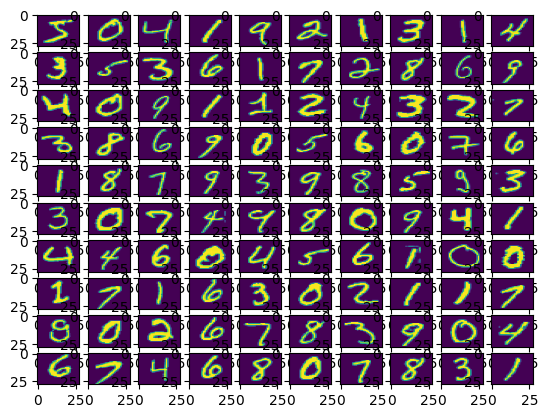

In [ ]:
fig, ax = pt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28),
                        aspect='auto')
        k += 1
pt.show()

In [ ]:
model = Sequential([

    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(28, 28)),

      # dense layer 1
    Dense(256, activation='sigmoid'),

    # dense layer 2
    Dense(128, activation='sigmoid'),

      # output layer
    Dense(10, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10,
          batch_size=2000,
          validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 3s 59ms/step - loss: 2.0865 - accuracy: 0.4341 - val_loss: 1.7290 - val_accuracy: 0.6972
Epoch 2/10
24/24 [==============================] - 1s 48ms/step - loss: 1.3819 - accuracy: 0.7329 - val_loss: 1.0168 - val_accuracy: 0.8102
Epoch 3/10
24/24 [==============================] - 1s 50ms/step - loss: 0.8520 - accuracy: 0.8145 - val_loss: 0.6627 - val_accuracy: 0.8548
Epoch 4/10
24/24 [==============================] - 1s 49ms/step - loss: 0.6021 - accuracy: 0.8592 - val_loss: 0.4962 - val_accuracy: 0.8859
Epoch 5/10
24/24 [==============================] - 1s 49ms/step - loss: 0.4756 - accuracy: 0.8832 - val_loss: 0.4084 - val_accuracy: 0.8977
Epoch 6/10
24/24 [==============================] - 1s 49ms/step - loss: 0.4045 - accuracy: 0.8964 - val_loss: 0.3576 - val_accuracy: 0.9064
Epoch 7/10
24/24 [==============================] - 1s 48ms/step - loss: 0.3599 - accuracy: 0.9047 - val_loss: 0.3234 - val_accuracy: 0.9130
Epoch 8/10
24

In [ ]:
results = model.evaluate(x_test, y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.27348172664642334, 0.9223999977111816]


In [ ]:
###############################################################################################
###############################################################################################
###############################################################################################

# **Task 01**____Boston House

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns: CRIM - per capita crime rate by town. ZN - proportion of residential land zoned for lots over 25,000 sq. ft.

In [ ]:
import pandas as pd
import sklearn

import tensorflow as t
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as pt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/My Drive/BostonHousing.csv')

In [ ]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
X = data.drop(['medv'],axis=1)
y = data['medv']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [ ]:
print("Feature matrix:", X_train.shape)
print("Target matrix:", X_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (354, 13)
Target matrix: (152, 13)
Feature matrix: (354,)
Target matrix: (152,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
input_shape = (1, 13)

In [ ]:
input_shape = (13,)

In [ ]:
model = Sequential([

    Dense(256, input_shape=input_shape,activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
  ])

In [ ]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
#model.compile(loss='mse',optimizer='Adadelta',metrics=['mae', 'mse'])

In [ ]:
model.fit(X_train, y_train, epochs=250, batch_size=1, verbose=1, validation_split=0.2)

Epoch 1/250
283/283 [==============================] - 1s 2ms/step - loss: 7.0769 - mean_squared_error: 113.4982 - val_loss: 3.4572 - val_mean_squared_error: 34.4280
Epoch 2/250
283/283 [==============================] - 0s 1ms/step - loss: 3.0448 - mean_squared_error: 18.8227 - val_loss: 4.3825 - val_mean_squared_error: 42.3056
Epoch 3/250
283/283 [==============================] - 0s 1ms/step - loss: 2.6120 - mean_squared_error: 14.0680 - val_loss: 3.1066 - val_mean_squared_error: 29.0732
Epoch 4/250
283/283 [==============================] - 0s 1ms/step - loss: 2.6014 - mean_squared_error: 14.3347 - val_loss: 3.1590 - val_mean_squared_error: 29.4149
Epoch 5/250
283/283 [==============================] - 0s 1ms/step - loss: 2.4238 - mean_squared_error: 12.6769 - val_loss: 3.1018 - val_mean_squared_error: 32.9426
Epoch 6/250
283/283 [==============================] - 0s 1ms/step - loss: 2.3820 - mean_squared_error: 12.6359 - val_loss: 3.3180 - val_mean_squared_error: 29.5245
Epoch 7/2

In [ ]:
results = model.evaluate(X_test, y_test, verbose = 0)
print('test loss, test MSE:', results)

test loss, test mse: [2.7530055046081543, 17.045276641845703]


In [ ]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
slr = LinearRegression()

# Train the model using the training sets
slr.fit(X_train, y_train)

# Model prediction on train data
from sklearn import metrics
y_pred = slr.predict(X_train)

# Model Evaluation
print('MSE:',metrics.mean_squared_error(y_train, y_pred))

MSE: 19.07368870346903


In [ ]:
###############################################################################################
###############################################################################################
###############################################################################################

# Task **02**_____CIFAR-10

Description
CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

Kaggle is hosting a CIFAR-10 leaderboard for the machine learning community to use for fun and practice. You can see how your approach compares to the latest research methods on Rodrigo Benenson's classification results page.

In [ ]:
import tensorflow as t
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as pt

In [ ]:
(x_train, y_train), (x_test, y_test) = t.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# For normalization image pixel values are divided by 255
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (50000, 32, 32, 3)
Target matrix: (10000, 32, 32, 3)
Feature matrix: (50000, 1)
Target matrix: (10000, 1)


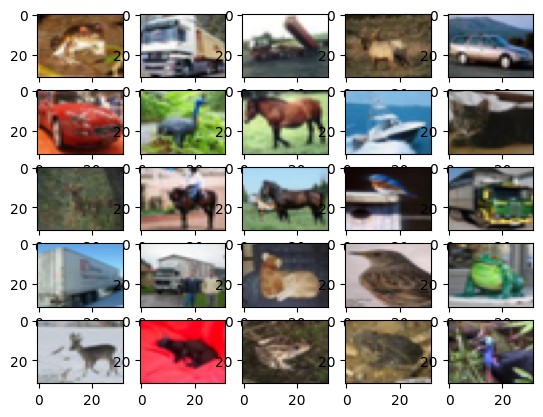

In [ ]:
fig, ax = pt.subplots(5, 5)
k = 0
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k].reshape(32, 32,3),
                        aspect='auto')
        k += 1
pt.show()

In [ ]:
model = Sequential([

    # reshape 32 row * 32 column * 3 color data to 32*32*3 rows
    Flatten(input_shape=(32, 32, 3)),

      # dense layer 1
    Dense(512, activation='sigmoid'),

    # dense layer 2
    Dense(256, activation='sigmoid'),

      # output layer
    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10,
          batch_size=2000,
          validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 6s 268ms/step - loss: 2.1931 - accuracy: 0.2048 - val_loss: 2.0332 - val_accuracy: 0.2679
Epoch 2/10
20/20 [==============================] - 4s 222ms/step - loss: 1.9504 - accuracy: 0.3083 - val_loss: 1.8978 - val_accuracy: 0.3246
Epoch 3/10
20/20 [==============================] - 4s 221ms/step - loss: 1.8521 - accuracy: 0.3476 - val_loss: 1.8360 - val_accuracy: 0.3485
Epoch 4/10
20/20 [==============================] - 5s 251ms/step - loss: 1.7952 - accuracy: 0.3663 - val_loss: 1.7994 - val_accuracy: 0.3651
Epoch 5/10
20/20 [==============================] - 4s 226ms/step - loss: 1.7540 - accuracy: 0.3833 - val_loss: 1.7535 - val_accuracy: 0.3765
Epoch 6/10
20/20 [==============================] - 5s 232ms/step - loss: 1.7203 - accuracy: 0.3938 - val_loss: 1.7214 - val_accuracy: 0.3938
Epoch 7/10
20/20 [==============================] - 5s 241ms/step - loss: 1.6903 - accuracy: 0.4050 - val_loss: 1.7098 - val_accuracy: 0.4005
Epoch 

In [ ]:
results = model.evaluate(x_test, y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [1.6419848203659058, 0.41780000925064087]
